In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import geopy as gpy

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
filepath = "datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [3]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

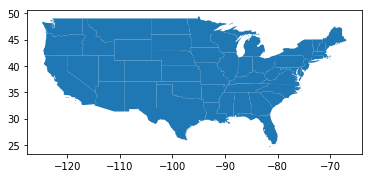

In [4]:
map48.plot()

In [5]:
filename = 'data_hurricaneSandy2012.csv'
Sandy_df = pd.read_csv(filename, sep=',')
Sandy_df

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/22/2012 11:00,13.5,78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN,10/22/2012 10:50,Berg/avila
1,1A,10/22/2012 14:00,13.5,78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN,10/22/2012 13:41,Berg/avila
2,2,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,10/22/2012 16:59,Pasch
3,2,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,10/22/2012 16:59,Pasch
4,2A,10/22/2012 20:00,12.7,78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,10/22/2012 19:35,Stewart
5,3,10/22/2012 23:00,12.7,78.6,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,10/22/2012 22:53,Stewart
6,3A,10/23/2012 02:00,12.9,78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,10/23/2012 01:56,Brown
7,4,10/23/2012 05:00,13.3,78.6,45,998,N at 3 MPH (360 deg),Tropical Storm,Sandy,10/23/2012 04:53,Brown
8,4A,10/23/2012 08:00,13.4,77.9,45,997,NNE at 3 MPH (20 deg),Tropical Storm,Sandy,10/23/2012 07:59,Pasch
9,5,10/23/2012 11:00,13.8,77.8,50,993,NNE at 5 MPH (20 deg),Tropical Storm,Sandy,10/23/2012 10:47,Pasch


In [6]:
Sandy_df['Long'] = 0 - Sandy_df['Long']

In [7]:
Sandy_df['coordinates'] = list(Sandy_df[['Long', 'Lat']].values)

In [8]:
Sandy_df['coordinates'] = Sandy_df['coordinates'].apply(Point)

In [9]:
geo_Sandy = gpd.GeoDataFrame(Sandy_df, geometry='coordinates')

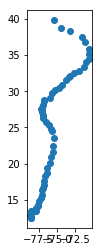

In [10]:
geo_Sandy.plot()

Text(0.5, 1.0, 'Hurricane Sandy Path')

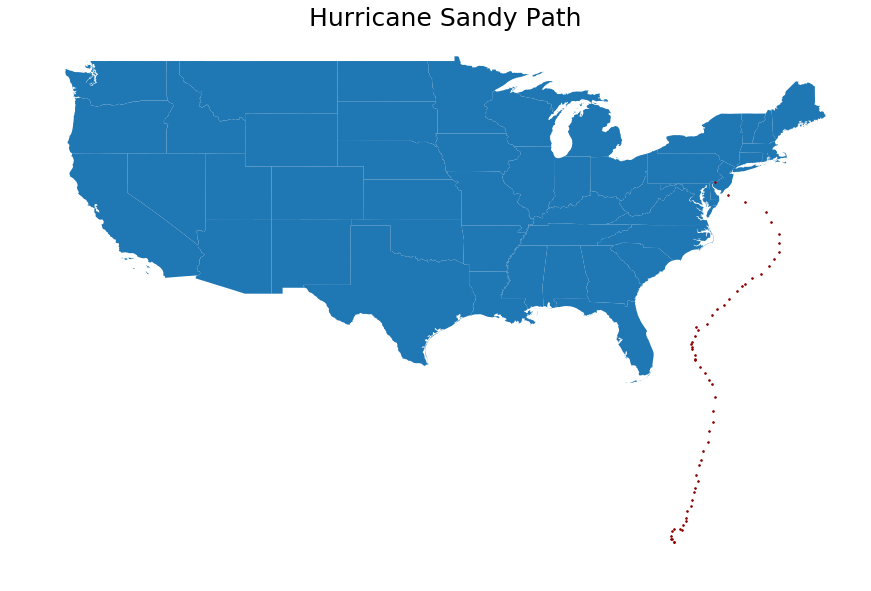

In [11]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_Sandy.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Sandy Path", fontsize=25, fontweight=3)